In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp


def runge_kutta_step(f, y, t, h, tol=1e-8, max_iter=10):
    """
    Perform a single Runge-Kutta step using the implicit method described by the Butcher tableau.
    """
    # Define the Butcher tableau
    c1 = (3 - sqrt(3)) / 6
    c2 = (3 + sqrt(3)) / 6
    a11 = 1/4
    a12 = (3 - 2*sqrt(3)) / 12
    a21 = (3 + 2*sqrt(3)) / 12
    a22 = 1/4
    b1 = 1/2
    b2 = 1/2

    # Initial guesses for k1 and k2 (explicit Euler step)
    k1 = f(t + c1*h, y)
    k2 = f(t + c2*h, y)

    for _ in range(max_iter):
        k1_new = f(t + c1*h, y + h * (a11*k1 + a12*k2))
        k2_new = f(t + c2*h, y + h * (a21*k1 + a22*k2))
        
        if np.linalg.norm(k1_new - k1) < tol and np.linalg.norm(k2_new - k2) < tol:
            break
        
        k1, k2 = k1_new, k2_new

    # Combine the stages to compute the next value of y
    y_new = y + h * (b1*k1 + b2*k2)
    
    return y_new

def solve_ode(f, y0, t0, tf, h):
    """
    Solve an ODE using the implicit Runge-Kutta method.
    """
    # Time points where we will evaluate the solution
    t_values = np.arange(t0, tf + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    
    # Set the initial condition
    y_values[0] = y0
    y = y0
    
    # Time stepping
    for i in range(1, len(t_values)):
        t = t_values[i-1]
        y = runge_kutta_step(f, y, t, h)
        y_values[i] = y
    
    return t_values, y_values

# # Define the ODE: dy/dt = -y, a simple exponential decay problem
# def f(t, y):
#     return -y

# # Initial condition
# y0 = np.array([1.0])
# t0 = 0.0
# tf = 2.0
# h = 0.1

# # Solve the ODE using the implicit Runge-Kutta method
# t_values, y_values = solve_ode(f, y0, t0, tf, h)

# # Exact solution
# y_exact = y0[0] * np.exp(-t_values)

# # Plotting the results
# plt.figure(figsize=(10, 6))
# plt.plot(t_values, y_values[:, 0], 'bo-', label='Implicit Runge-Kutta')
# plt.plot(t_values, y_exact, 'r-', label='Exact solution')
# plt.xlabel('t')
# plt.ylabel('y(t)')
# plt.title('Comparison of Implicit Runge-Kutta Method with Exact Solution')
# plt.legend()
# plt.grid(True)
# plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp
from Capitulo1_metodos import IRK

# Define the ODE: dy/dt = -y, a simple exponential decay problem
def f(t, y):
    return -y

# Initial condition
y0 = np.array([1.0])
t0 = 0.0
tf = 2.0
h = 0.1

# Solve the ODE using the implicit Runge-Kutta method
t_values, y_values = IRK(f, (t0,tf), y0, h, return_trajectory=True)

# Exact solution
y_exact = y0[0] * np.exp(-t_values)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_values[:, 0], 'bo-', label='Implicit Runge-Kutta')
plt.plot(t_values, y_exact, 'r-', label='Exact solution')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparison of Implicit Runge-Kutta Method with Exact Solution')
plt.legend()
plt.grid(True)
plt.show()

IndentationError: unexpected indent (Capitulo1_metodos.py, line 186)

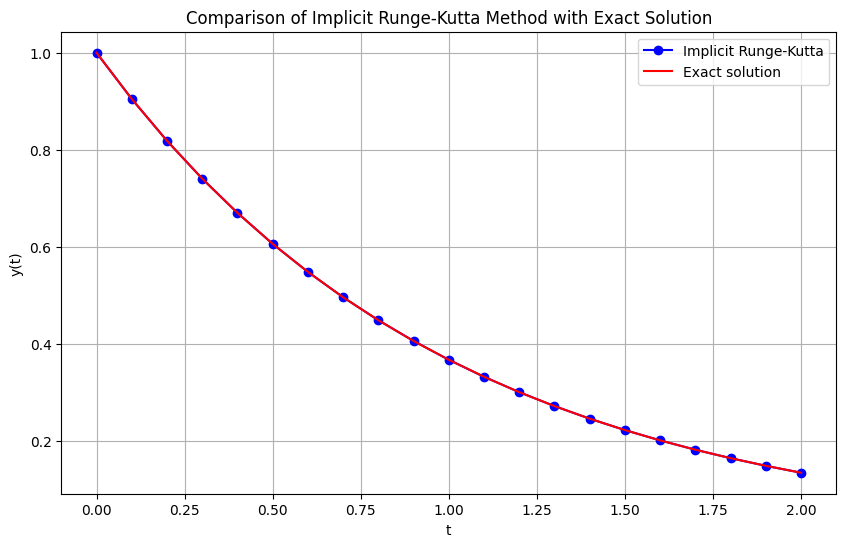

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp
from Capitulo1_metodos import IRK, ButcherTableau

# Define the ODE: dy/dt = -y, a simple exponential decay problem
def f(t, y):
    return -y

# Initial condition
y0 = np.array([1.0])
t0 = 0.0
tf = 2.0
h = 0.1

# Solve the ODE using the implicit Runge-Kutta method
# IRK2 = ButcherTableau.IRK2()
# t_values, y_values = IRK(f, (t0,tf), y0, h, return_trajectory=True, ButcherTab=IRK2)


t_values, y_values = solve_ode(f, y0, t0, tf, h)
# Exact solution
y_exact = y0[0] * np.exp(-t_values)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_values[:, 0], 'bo-', label='Implicit Runge-Kutta')
plt.plot(t_values, y_exact, 'r-', label='Exact solution')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparison of Implicit Runge-Kutta Method with Exact Solution')
plt.legend()
plt.grid(True)
plt.show()

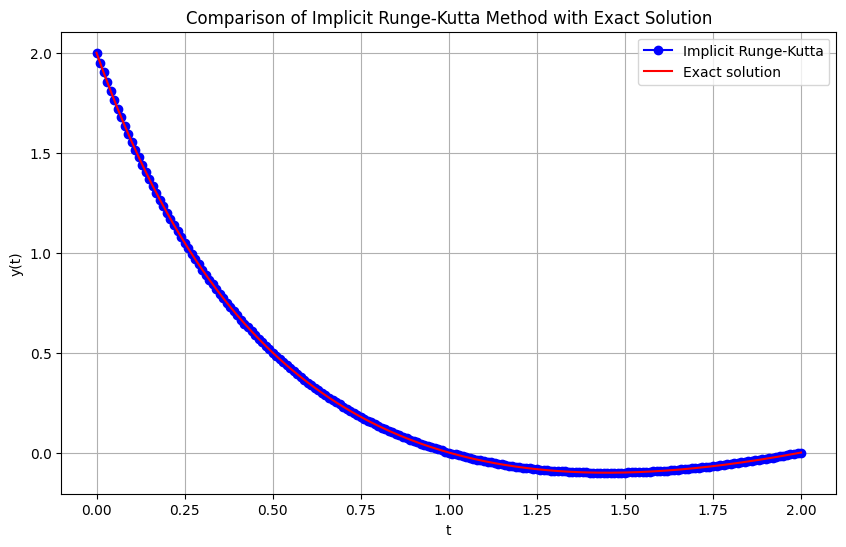

In [7]:
from Capitulo1_metodos import IRK, ButcherTableau

# Define the ODE: dy/dt = -y, a simple exponential decay problem
def funtarea1(t,y):
    return y**2 - (t**4-6.0*t**3 +12.0*t**2 - 14.0*t + 9.0)/(1.0+t)**2

# Initial condition
y0 = np.array([2.0])
t0 = 0.0
tf = 2.0
h = 0.01

# Solve the ODE using the implicit Runge-Kutta method
IRK2 = ButcherTableau.IRK2()
# t_values, y_values = IRK(funtarea1, (t0,tf), y0, h, return_trajectory=True, ButcherTab=IRK2)
t_values, y_values = solve_ode(funtarea1, y0, t0, tf, h)
# Exact solution
# \frac{(1-t)(2-t)}{1+t}
y_exact = (1-t_values)*(2-t_values)/(1+t_values)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_values[:, 0], 'bo-', label='Implicit Runge-Kutta')
plt.plot(t_values, y_exact, 'r-', label='Exact solution')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparison of Implicit Runge-Kutta Method with Exact Solution')
plt.legend()
plt.grid(True)
plt.show()

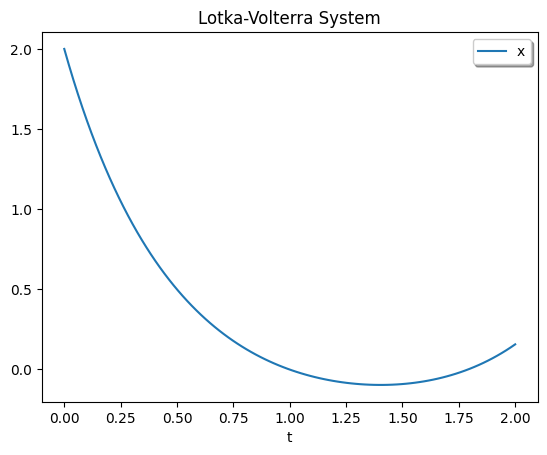

In [17]:
from scipy.integrate import solve_ivp

sol = solve_ivp(funtarea1, [0, 1], y0=[2.0], dense_output=True)

t = np.linspace(0, 2, 100)
z = sol.sol(t)
import matplotlib.pyplot as plt
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

In [36]:
def Euler_implicito(odefun, t_span, y0, h, return_trajectory=False, odefunprime=None ): 
    
    '''
    Metodo de Euler implicito
    Resuelve: dy/dy = odefun(t,y), y(t0) = y0
    Input  : odefun, t_span = (tiemp inicial, tiempo final)
             y0 condicion inicial, h paso en t, 
             return_trajectory returnar o no toda la trajectoria de la solucion
    Output : (t,y)
    '''
    t0, tf = t_span
    t = t0; y = y0
    
    if return_trajectory: yh = []; tn = []; yh.append(y0); tn.append(0.0)
    while tf-t>1e-14:
        # Paso de Euler implicito con iteracion de punto fijo
        y = paso_Euler_implicito(odefun, y, t, h)
        t+=h
        if return_trajectory: yh.append(y); tn.append(t)
            
    if return_trajectory: return (np.array(yh,dtype=object),np.array(tn,dtype=object)) 
    else: return y,t
from scipy.optimize import fsolve

def paso_Euler_implicito(odefun, y, t, h):
    F = lambda y_new: y_new - y - h*odefun(t+h, y_new)
    y_new = fsolve(F, y)

    return y_new

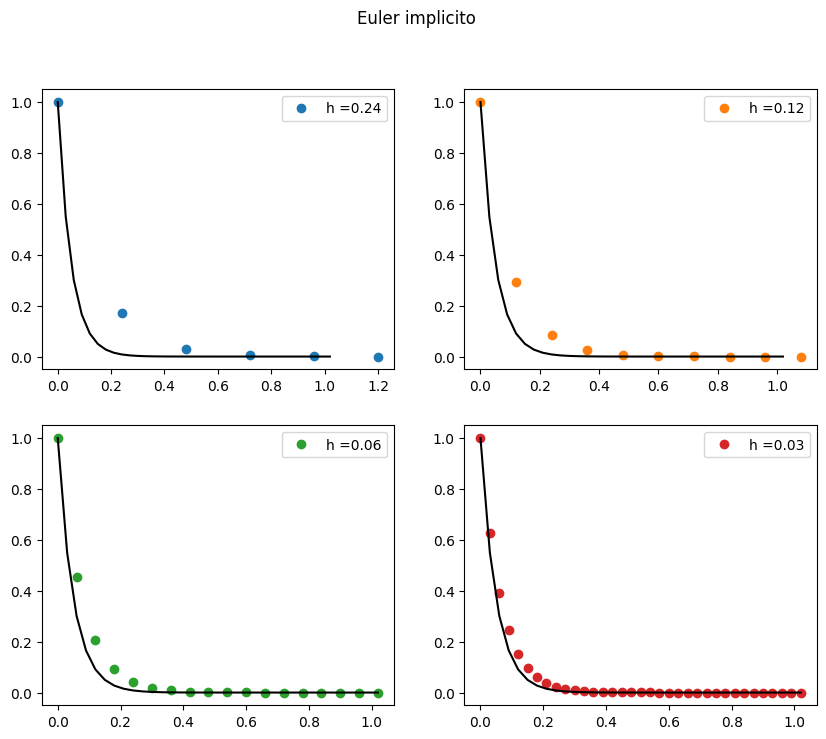

In [37]:

fstiff1 = lambda x,y : -20*y
dfstiff1dy = lambda x,y: -20
y0 = 1.0
XM = 1.0
h = [0.24, 0.12, 0.06, 0.03]
N = [int(XM/hi) for hi in h]

yexact = lambda x: np.exp(-20*x)
YH = []
XH = []
YHi = []
# Euler
for i,hi in enumerate(h):
    yhi, xh = Euler_implicito(odefun=fstiff1, t_span=(0.0, XM), y0=y0, h=h[i], return_trajectory=True, odefunprime=dfstiff1dy)
    XH.append(xh)
    YHi.append(yhi)


figi, axi = plt.subplots(2,2, figsize=(10,8))
figi.suptitle('Euler implicito')
axi[0,0].plot(XH[0],YHi[0], 'o', color='C00',label='h =%.2f'%h[0])
axi[0,0].plot(XH[3], yexact( np.array(XH[3], dtype=float) ),'k')
axi[0,0].legend()
axi[0,1].plot(XH[1],YHi[1], 'o', color='C01',label='h =%.2f'%h[1])
axi[0,1].plot(XH[3], yexact(np.array(XH[3], float)),'k')
axi[0,1].legend()
axi[1,0].plot(XH[2],YHi[2], 'o', color='C02',label='h =%.2f'%h[2])
axi[1,0].plot(XH[3], yexact(np.array(XH[3], float)),'k')
axi[1,0].legend()
axi[1,1].plot(XH[3],YHi[3], 'o', color='C03',label='h =%.2f'%h[3])
axi[1,1].plot(XH[3], yexact(np.array(XH[3], float)),'k')
axi[1,1].legend()
plt.show()
